In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pylab as plt


In [2]:
df = pd.read_excel('resturant (1).xlsx')

In [3]:
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                           phone  \
0            Yes   4.1/5    775    080 42297555\n+91 9743772233   
1             No   4.1/5    787                    080 41714161   
2             No   3.8/5    918                  +91 9663487993   
3             No   3.7/5     88                  +91 9620009302   
4             No   3.8/5    166  +91 8026612447\n+91 9901210005   
...          ...     ...    ...                             ...   
51712         No  3.6 /5     27                    080 40301477   
51713         No     NaN      0                  +91 8197675843   
51714         No     NaN      0                             NaN   
51715        Yes  4.3 /5    236                    080 49652769   
51716         No  3.4 /5     13                  +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Cho

In [4]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                           phone  \
0          Yes        Yes  4.1/5    775    080 42297555\n+91 9743772233   
1          Yes         No  4.1/5    787                    080 41714161   
2          Yes         No  3.8/5    918                  +91 9663487993   
3           No         No  3.7/5     88                  +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)'],inplace=True,axis=1)

In [7]:
df

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                    location  \
0            Yes   4.1/5    775                Banashankari   
1             No   4.1/5    787                Banashankari   
2             No   3.8/5    918                Banashankari   
3             No   3.7/5     88                Banashankari   
4             No   3.8/5    166                Basavanagudi   
...          ...     ...    ...                         ...   
51712         No  3.6 /5     27                  Whitefield   
51713         No     NaN      0                  Whitefield   
51714         No     NaN      0                  Whitefield   
51715        Yes  4.3 /5    236  ITPL Main Road, Whitefield   
51716         No  3.4 /5     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51712                  Bar                                                NaN   
51713                  Bar                                                NaN   
51714                  Bar                                                NaN   
51715                  Bar                       Cocktails, Pizza, Buttermilk   
51716   Bar, Casual Dining                                                NaN   

                                     cuisines  approx_cost(for two people)  \
0              North Indian, Mughlai, Chinese                        800.0   
1                 Chinese, North Indian, Thai                        800.0   
2                      Cafe, Mexican, Italian                        800.0   
3                  South Indian, North Indian                        300.0   
4                    North Indian, Rajasthani                        600.0   
...                                       ...                          ...   
51712                             Continental                       1500.0   
51713                             Finger Food                        600.0   
51714                             Finger Food                       2000.0   
51715                             Finger Food                       2500.0   
51716  Finger Food, North Indian, Continental                       1500.0   

      listed_in(type)  
0              Buffet  
1              Buffet  
2              Buffet  
3              Buffet  
4              Buffet  
...               ...  
51712   Pubs and bars  
51713   Pubs and bars  
51714   Pubs and bars  
51715   Pubs and bars  
51716   Pubs and bars  

[51717 rows x 11 columns]

In [10]:
df.shape

(51717, 11)

In [13]:
len(df.columns)

11

In [11]:
df.duplicated().sum()

16608

In [12]:
after_dropping_duplicate = df.drop_duplicates()

In [40]:
after_dropping_duplicate

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                    location  \
0            Yes   4.1/5    775                Banashankari   
1             No   4.1/5    787                Banashankari   
2             No   3.8/5    918                Banashankari   
3             No   3.7/5     88                Banashankari   
4             No   3.8/5    166                Basavanagudi   
...          ...     ...    ...                         ...   
51712         No  3.6 /5     27                  Whitefield   
51713         No     NaN      0                  Whitefield   
51714         No     NaN      0                  Whitefield   
51715        Yes  4.3 /5    236  ITPL Main Road, Whitefield   
51716         No  3.4 /5     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51712                  Bar                                                NaN   
51713                  Bar                                                NaN   
51714                  Bar                                                NaN   
51715                  Bar                       Cocktails, Pizza, Buttermilk   
51716   Bar, Casual Dining                                                NaN   

                                     cuisines  approx_cost(for two people)  \
0              North Indian, Mughlai, Chinese                        800.0   
1                 Chinese, North Indian, Thai                        800.0   
2                      Cafe, Mexican, Italian                        800.0   
3                  South Indian, North Indian                        300.0   
4                    North Indian, Rajasthani                        600.0   
...                                       ...                          ...   
51712                             Continental                       1500.0   
51713                             Finger Food                        600.0   
51714                             Finger Food                       2000.0   
51715                             Finger Food                       2500.0   
51716  Finger Food, North Indian, Continental                       1500.0   

      listed_in(type)  
0              Buffet  
1              Buffet  
2              Buffet  
3              Buffet  
4              Buffet  
...               ...  
51712   Pubs and bars  
51713   Pubs and bars  
51714   Pubs and bars  
51715   Pubs and bars  
51716   Pubs and bars  

[35109 rows x 11 columns]

In [41]:
after_dropping_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         31339 non-null  object 
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.2+ MB


In [42]:
after_dropping_duplicate['name'][:20]

0                                                 Jalsa
1                                        Spice Elephant
2                                       San Churro Cafe
3                                 Addhuri Udupi Bhojana
4                                         Grand Village
5                                       Timepass Dinner
6       Rosewood International Hotel - Bar & Restaurant
7                                                Onesta
8                                        Penthouse Cafe
9                                             Smacznego
10    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
11                                         Cafe Shuffle
12                                     The Coffee Shack
13                                           Caf-Eleven
14                                      San Churro Cafe
15                                        Cafe Vivacity
16                                         Catch-up-ino
17                                     Kirthi's 

In [43]:
after_dropping_duplicate['name'].iloc[10]

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [44]:
after_dropping_duplicate['name'].iloc[1750:1800]

1751                                               Arzak
1752                            Furry Fairy Paw Paradise
1753                                               Petoo
1754                                         Night Panda
1755                                         Spicy Grill
1756    E2 - EntrÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©e Envoy
1757                                       Aha Juice Bar
1758                         Cafe Club Kerala Restaurant
1759                                      Cake N Cookies
1760                                      Bright Go Nuts
1761                                     Hotel Namadhari
1762                                  Nammuru Nati Hotel
1763                                          3ice Cubes
1764                                    Tasty Restaurant
1765                                        Hotel Ambara
1766                                       Biryani Treat
1767                                        Best Biryani
1768                           

In [45]:
def clean_rest_name(name):
    if isinstance(name,str):
        if re.findall(r'[a-zA-Z0-9 ]',name):
            list_name = re.findall(r'[a-zA-Z0-9 ]',name)
            string_name ="".join(list_name)
            return string_name
        else:
            return name
            

In [46]:
after_dropping_duplicate['name'] = after_dropping_duplicate['name'].apply(clean_rest_name)

/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3647/3460974324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['name'] = after_dropping_duplicate['name'].apply(clean_rest_name)


In [47]:
after_dropping_duplicate.head()

name online_order book_table   rate  votes      location  \
0                  Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1         Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2        San Churro Cafe          Yes         No  3.8/5    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88  Banashankari   
4          Grand Village           No         No  3.8/5    166  Basavanagudi   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people) listed_in(type)  
0  North Indian, Mughlai, Chinese                        800.0          Buffet  
1     Chinese, North Indian, Thai                        800.0          Buffet  
2          Cafe, Mexican, Italian                        800.0          Buffet  
3      South Indian, North Indian                        300.0          Buffet  
4        North Indian, Rajasthani                        600.0          Buffet

In [48]:
after_dropping_duplicate['online_order'].value_counts()

online_order
Yes    20886
No     14223
Name: count, dtype: int64

In [49]:
after_dropping_duplicate['book_table'].value_counts()

book_table
No     29675
Yes     5434
Name: count, dtype: int64

In [50]:
after_dropping_duplicate['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 35109, dtype: object

In [51]:
after_dropping_duplicate['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [52]:
float('4.1/5'.split('/')[0])

4.1

In [53]:
def clean_rate(rates):
    if rates == "-" or rates == "NEW":
        return np.nan
    else:
        rates_converted = float(str(rates).split('/')[0])
        return rates_converted


In [54]:
after_dropping_duplicate['rate']=after_dropping_duplicate['rate'].apply(clean_rate)

/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3647/2126498299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate']=after_dropping_duplicate['rate'].apply(clean_rate)


In [55]:
after_dropping_duplicate['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35109, dtype: float64

In [56]:



after_dropping_duplicate

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712      Best Brews  Four Points by Sheraton Bengaluru           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge  Sheraton Grand Bengaluru Whitefield Ho...           No   
51715  Chime  Sheraton Grand Bengaluru Whitefield Hotel            No   
51716                        The Nest  The Den Bengaluru           No   

      book_table  rate  votes                    location  \
0            Yes   4.1    775                Banashankari   
1             No   4.1    787                Banashankari   
2             No   3.8    918                Banashankari   
3             No   3.7     88                Banashankari   
4             No   3.8    166                Basavanagudi   
...          ...   ...    ...                         ...   
51712         No   3.6     27                  Whitefield   
51713         No   NaN      0                  Whitefield   
51714         No   NaN      0                  Whitefield   
51715        Yes   4.3    236  ITPL Main Road, Whitefield   
51716         No   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51712                  Bar                                                NaN   
51713                  Bar                                                NaN   
51714                  Bar                                                NaN   
51715                  Bar                       Cocktails, Pizza, Buttermilk   
51716   Bar, Casual Dining                                                NaN   

                                     cuisines  approx_cost(for two people)  \
0              North Indian, Mughlai, Chinese                        800.0   
1                 Chinese, North Indian, Thai                        800.0   
2                      Cafe, Mexican, Italian                        800.0   
3                  South Indian, North Indian                        300.0   
4                    North Indian, Rajasthani                        600.0   
...                                       ...                          ...   
51712                             Continental                       1500.0   
51713                             Finger Food                        600.0   
51714                             Finger Food                       2000.0   
51715                             Finger Food                       2500.0   
51716  Finger Food, North Indian, Continental                       1500.0   

      listed_in(type)  
0              Buffet  
1              Buffet  
2              Buffet  
3              Buffet  
4              Buffet  
...               ...  
51712   Pubs and bars  
51713   Pubs and bars  
51714   Pubs and bars  
51715   Pubs and bars  
51716   Pubs and bars  

[35109 rows x 11 columns]

In [57]:
after_dropping_duplicate['rate'].mean()

3.731078872769718

In [58]:
after_dropping_duplicate['rate'].fillna(after_dropping_duplicate['rate'].mean(),inplace=True)


/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3647/1098319011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate'].fillna(after_dropping_duplicate['rate'].mean(),inplace=True)


In [59]:
after_dropping_duplicate


name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712      Best Brews  Four Points by Sheraton Bengaluru           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge  Sheraton Grand Bengaluru Whitefield Ho...           No   
51715  Chime  Sheraton Grand Bengaluru Whitefield Hotel            No   
51716                        The Nest  The Den Bengaluru           No   

      book_table      rate  votes                    location  \
0            Yes  4.100000    775                Banashankari   
1             No  4.100000    787                Banashankari   
2             No  3.800000    918                Banashankari   
3             No  3.700000     88                Banashankari   
4             No  3.800000    166                Basavanagudi   
...          ...       ...    ...                         ...   
51712         No  3.600000     27                  Whitefield   
51713         No  3.731079      0                  Whitefield   
51714         No  3.731079      0                  Whitefield   
51715        Yes  4.300000    236  ITPL Main Road, Whitefield   
51716         No  3.400000     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51712                  Bar                                                NaN   
51713                  Bar                                                NaN   
51714                  Bar                                                NaN   
51715                  Bar                       Cocktails, Pizza, Buttermilk   
51716   Bar, Casual Dining                                                NaN   

                                     cuisines  approx_cost(for two people)  \
0              North Indian, Mughlai, Chinese                        800.0   
1                 Chinese, North Indian, Thai                        800.0   
2                      Cafe, Mexican, Italian                        800.0   
3                  South Indian, North Indian                        300.0   
4                    North Indian, Rajasthani                        600.0   
...                                       ...                          ...   
51712                             Continental                       1500.0   
51713                             Finger Food                        600.0   
51714                             Finger Food                       2000.0   
51715                             Finger Food                       2500.0   
51716  Finger Food, North Indian, Continental                       1500.0   

      listed_in(type)  
0              Buffet  
1              Buffet  
2              Buffet  
3              Buffet  
4              Buffet  
...               ...  
51712   Pubs and bars  
51713   Pubs and bars  
51714   Pubs and bars  
51715   Pubs and bars  
51716   Pubs and bars  

[35109 rows x 11 columns]

In [60]:
after_dropping_duplicate['votes'].value_counts()


votes
0       5099
4        764
6        632
7        551
9        469
        ... 
2569       1
575        1
7227       1
1290       1
843        1
Name: count, Length: 2328, dtype: int64

In [61]:
after_dropping_duplicate['votes'].value_counts()
after_dropping_duplicate.info()


<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35095 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


In [62]:
pd.set_option('display.max_rows',None)
after_dropping_duplicate['location'].value_counts()

location
BTM                              2520
Whitefield                       1972
Indiranagar                      1792
HSR                              1774
Marathahalli                     1683
Koramangala 5th Block            1623
JP Nagar                         1426
Jayanagar                        1253
Electronic City                  1222
Bellandur                        1138
Bannerghatta Road                1064
Sarjapur Road                     950
Brigade Road                      690
Koramangala 7th Block             628
Koramangala 6th Block             607
Brookefield                       600
Kalyan Nagar                      595
Koramangala 4th Block             589
New BEL Road                      586
Banashankari                      574
MG Road                           573
Malleshwaram                      557
Ulsoor                            552
Koramangala 1st Block             542
Frazer Town                       476
Basavanagudi                      463
Raj

In [63]:
after_dropping_duplicate['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [64]:
after_dropping_duplicate['location'].fillna("No Info",inplace=True)


/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3647/1010154846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['location'].fillna("No Info",inplace=True)


In [65]:
after_dropping_duplicate['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'No Info', 'CV Raman Nagar', 'Electronic City',
       'HSR', 'Marathahalli', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Jalahalli',
       'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipu

In [66]:
after_dropping_duplicate['rest_type'].unique()


array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [67]:
after_dropping_duplicate['rest_type'].fillna("No Info",inplace=True)


/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3647/301701998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rest_type'].fillna("No Info",inplace=True)


In [68]:
after_dropping_duplicate['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [69]:
for item in after_dropping_duplicate['dish_liked'].unique():
    print(item)

Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup
Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani
Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza
Masala Dosa
Panipuri, Gol Gappe
Onion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera Rice
nan
Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza
Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches
Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos
Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe
Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos
Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic Bread
Sandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut Cappuccino
Garlic Bread, Burgers, Sandwiches, Pizza, Hot Chocolat

In [70]:

after_dropping_duplicate['dish_liked'].fillna("No Info",inplace=True)


/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3647/2651236738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['dish_liked'].fillna("No Info",inplace=True)


In [71]:
after_dropping_duplicate.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

In [72]:

after_dropping_duplicate['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [73]:

for item in after_dropping_duplicate['cuisines'].unique():
    print(item
         )         


North Indian, Mughlai, Chinese
Chinese, North Indian, Thai
Cafe, Mexican, Italian
South Indian, North Indian
North Indian, Rajasthani
North Indian
North Indian, South Indian, Andhra, Chinese
Pizza, Cafe, Italian
Cafe, Italian, Continental
Cafe, Mexican, Italian, Momos, Beverages
Cafe
Cafe, Chinese, Continental, Italian
Cafe, Continental
Cafe, Fast Food, Continental, Chinese, Momos
Chinese, Cafe, Italian
Cafe, Italian, American
Cafe, French, North Indian
Cafe, Pizza, Fast Food, Beverages
Cafe, Fast Food
Italian, Fast Food, Cafe, European
Cafe, Bakery
Cafe, South Indian
Cafe, Fast Food, Beverages
North Indian, Cafe, Chinese, Fast Food
Cafe, Italian
North Indian, Fast Food, Chinese, Burger
Bakery, Desserts
Pizza
North Indian, Biryani, Fast Food
Biryani
North Indian, Chinese, Fast Food
Chinese, Thai, Momos
North Indian, Mughlai, South Indian, Chinese
South Indian
Street Food, Fast Food
Burger, Fast Food
Pizza, Fast Food
North Indian, Continental, Italian
North Indian, Chinese
North Indian,

In [74]:


after_dropping_duplicate['cuisines'].fillna("No Info",inplace=True)


/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3647/203210157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['cuisines'].fillna("No Info",inplace=True)


In [75]:
after_dropping_duplicate['approx_cost(for two people)'].unique()



array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [76]:
after_dropping_duplicate_group = after_dropping_duplicate.fillna(after_dropping_duplicate.groupby('rest_type')['approx_cost(for two people)'].transform("mean"))


In [77]:
after_dropping_duplicate_group['approx_cost(for two people)'].unique()


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [78]:
float(np.nan)

nan

In [79]:
after_dropping_duplicate['approx_cost(for two people)'] = after_dropping_duplicate['approx_cost(for two people)'].fillna(after_dropping_duplicate['approx_cost(for two people)'].mean())


/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_3647/250825638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['approx_cost(for two people)'] = after_dropping_duplicate['approx_cost(for two people)'].fillna(after_dropping_duplicate['approx_cost(for two people)'].mean())


In [82]:
after_dropping_duplicate.groupby("name")[['votes']].mean().sort_values(by="votes",ascending=False).head(10).reset_index()


name         votes
0  Byg Brewski Brewing Company  16588.500000
1                         Toit  14956.000000
2              The Black Pearl   9562.333333
3                  Big Pitcher   9164.500000
4        Arbor Brewing Company   8396.545455
5               Prost Brew Pub   7861.666667
6         Church Street Social   7561.727273
7                         Hoot   7257.000000
8                     Truffles   7139.952381
9    The Hole in the Wall Cafe   7124.875000

In [83]:
after_dropping_duplicate['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.73107887, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [84]:
after_dropping_duplicate.head(10)

name online_order book_table  \
0                                          Jalsa          Yes        Yes   
1                                 Spice Elephant          Yes         No   
2                                San Churro Cafe          Yes         No   
3                          Addhuri Udupi Bhojana           No         No   
4                                  Grand Village           No         No   
5                                Timepass Dinner          Yes         No   
6  Rosewood International Hotel  Bar  Restaurant           No         No   
7                                         Onesta          Yes        Yes   
8                                 Penthouse Cafe          Yes         No   
9                                      Smacznego          Yes         No   

   rate  votes      location            rest_type  \
0   4.1    775  Banashankari        Casual Dining   
1   4.1    787  Banashankari        Casual Dining   
2   3.8    918  Banashankari  Cafe, Casual Dining   
3   3.7     88  Banashankari          Quick Bites   
4   3.8    166  Basavanagudi        Casual Dining   
5   3.8    286  Basavanagudi        Casual Dining   
6   3.6      8   Mysore Road        Casual Dining   
7   4.6   2556  Banashankari  Casual Dining, Cafe   
8   4.0    324  Banashankari                 Cafe   
9   4.2    504  Banashankari                 Cafe   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   
5  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   
6                                            No Info   
7  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
8  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
9  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   

                                      cuisines  approx_cost(for two people)  \
0               North Indian, Mughlai, Chinese                        800.0   
1                  Chinese, North Indian, Thai                        800.0   
2                       Cafe, Mexican, Italian                        800.0   
3                   South Indian, North Indian                        300.0   
4                     North Indian, Rajasthani                        600.0   
5                                 North Indian                        600.0   
6  North Indian, South Indian, Andhra, Chinese                        800.0   
7                         Pizza, Cafe, Italian                        600.0   
8                   Cafe, Italian, Continental                        700.0   
9     Cafe, Mexican, Italian, Momos, Beverages                        550.0   

  listed_in(type)  
0          Buffet  
1          Buffet  
2          Buffet  
3          Buffet  
4          Buffet  
5          Buffet  
6          Buffet  
7           Cafes  
8           Cafes  
9           Cafes

In [85]:
type_counts = after_dropping_duplicate.groupby('listed_in(type)').count()


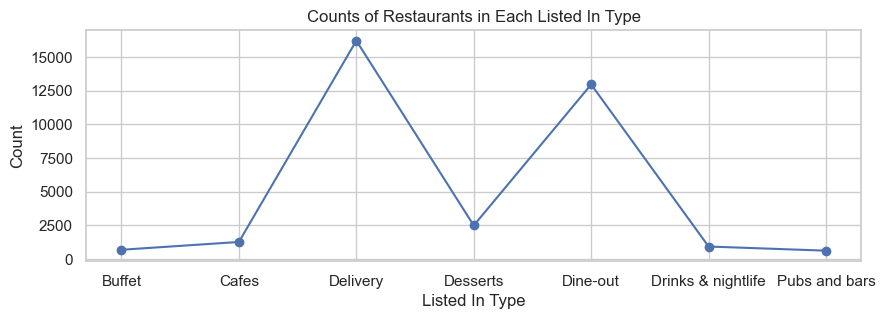

In [86]:
fig, ax = plt.subplots(figsize=(10, 3))

ax.plot(type_counts.index, type_counts['name'], marker='o', linestyle='-', color='b')

ax.set_xlabel('Listed In Type')
ax.set_ylabel('Count')
ax.set_title('Counts of Restaurants in Each Listed In Type')

plt.show()

In [118]:
restaurant_info = after_dropping_duplicate.groupby(['dish_liked', 'approx_cost(for two people)']).agg({
    'name': 'count',
    'rate': 'mean'
}).reset_index()


In [119]:
restaurant_info 

dish_liked  \
0     Aam Panna, Pasta, Biryani, Paneer Tikka, Chine...   
1     Aam Panna, Pasta, Chinese Bhel, Biryani, Panee...   
2     Aam Panna, Pasta, Paneer Tikka, Biryani, Pav B...   
3                                        Afghan Chicken   
4                                Akki Rottis, Neer Dosa   
5     Akki Rottis, Roti, Rava Idli, Filter Coffee, P...   
6     Akki Rottis, Rumali Roti, Masala Dosa, Vada, R...   
7     Al Faham Chicken, Kalmi Kebab, Bbq Chicken, Ch...   
8     Alfam Chicken, Ghee Rice, Chicken Curry, Mutto...   
9                             Almond Shake, Pizza Fries   
10    Aloo Gobhi, Mocktails, Veg Buffet, Dahi Vada, ...   
11    Aloo Palya, Masala Poori, Panipuri, Rolls, Cha...   
12                                         Aloo Paratha   
13                                         Aloo Paratha   
14                                         Aloo Paratha   
15                          Aloo Paratha, Ande Ka Funda   
16    Aloo Paratha, Burgers, Momos, Gulab Jamun, Mut...   
17                     Aloo Paratha, Dal Makhani, Chaat   
18    Aloo Paratha, Dal Makhani, Paneer Parantha, Chaat   
19    Aloo Paratha, Highway Chicken, Amritsari Kulch...   
20    Aloo Paratha, Litti, Dal Makhani, Sattu Parath...   
21                             Aloo Paratha, Manchurian   
22    Aloo Paratha, Masala Dosa, Coffee, Dahi Vada, ...   
23                  Aloo Paratha, Panneer Butter Masala   
24           Aloo Paratha, Poha, Samosa, Kachori, Chaat   
25                   Aloo Paratha, Roti, Butter Chicken   
26           Aloo Paratha, Samosa, Kachori, Poha, Chaat   
27    Aloo Paratha, Veggie Wrap, Sabudana Kheer, Chi...   
28    Aloo Pyaz Paratha, Kheer, Salad, Salads, Thali...   
29    Aloo Pyaz Paratha, Kheer, Salads, Chocolate Ba...   
30    Aloo Pyaz Paratha, Kheer, Salads, Salad, Thali...   
31                                      Aloo Tikki Chat   
32                                        Ambur Biryani   
33    Ambur Biryani, Mutton Biryani, Prawn, Raita, B...   
34                 Ambur Biryani, Mutton Biryani, Raita   
35                     Ambur Biryani, Vegetable Biryani   
36            Andhra Chicken Curry, Fried Rice, Biryani   
37    Andhra Chicken Curry, Hyderabadi Chicken Dum B...   
38    Andhra Meal, Andhra Style Chilli Chicken, Chic...   
39                  Andhra Meal, Biryani, Chicken Curry   
40    Andhra Meal, Chicken Pepper Dry, Andhra Thali,...   
41    Andhra Meal, Cocktails, Chicken Biryani, Panne...   
42    Andhra Meal, Mutton Biryani, Chicken Sholay, C...   
43    Andhra Meal, Mutton Biryani, Pepper Chicken, V...   
44    Andhra Meal, Mutton Soup, Vegetable Biryani, N...   
45    Andhra Meal, Potato Wedges, Chicken Biryani, C...   
46                                   Andhra Meal, Thali   
47                       Andhra Meal, Vegetable Biryani   
48    Andhra Meal, Vegetable Biryani, Veg Thali, Chi...   
49    Andhra Thali, Chicken Lollipop, Mutton Biryani...   
50    Andhra Thali, Mutton Biryani, Mutton Fry, Lass...   
51    Andhra Thali, Rice, Mango Dal, Salad, Chicken ...   
52    Andhra Thali, Veg Thali, Chicken Biryani, Kodi...   
53    Andhra Thali, Veg Thali, Lollipop Biryani, Chi...   
54    Andhra Thali, Veg Thali, Ulavacharu Mutton Bir...   
55    Anjal Masala Fry, Pasta, Veg Platter, Biryani,...   
56                                                Appam   
57                                                Appam   
58    Appam, Buttermilk, Fry Prawns, Roast Beef, Mas...   
59    Appam, Buttermilk, Idiyappam, Kerala Parotta, ...   
60    Appam, Buttermilk, Idiyappam, Kerala Parotta, ...   
61                  Appam, Chicken Biryani, Butter Naan   
62    Appam, Chicken Biryani, Kizhi Biryani, Kuluki ...   
63    Appam, Chicken Biryani, Kuluki Sarbat, Panneer...   
64     Appam, Chicken Curry, Passion Fruit Juice, Crepe   
65    Appam, Chicken Stew, Chicken Curry, Sea Food, ...   
66    Appam, Cocktails, Tiramisu, Mocktails, Kebab P...   
67                               

In [64]:
sorted_dish_cuisine_info= after_dropping_duplicate.groupby(['dish_liked', 'cuisines']).agg({
    'name': 'count',   
    'rate': ['mean', 'sum']  
}).reset_index()


In [65]:
sorted_dish_cuisine_info 

dish_liked  \
                                                          
0     Aam Panna, Pasta, Biryani, Paneer Tikka, Chine...   
1     Aam Panna, Pasta, Chinese Bhel, Biryani, Panee...   
2     Aam Panna, Pasta, Paneer Tikka, Biryani, Pav B...   
3                                        Afghan Chicken   
4                                Akki Rottis, Neer Dosa   
5     Akki Rottis, Roti, Rava Idli, Filter Coffee, P...   
6     Akki Rottis, Rumali Roti, Masala Dosa, Vada, R...   
7     Al Faham Chicken, Kalmi Kebab, Bbq Chicken, Ch...   
8     Alfam Chicken, Ghee Rice, Chicken Curry, Mutto...   
9                             Almond Shake, Pizza Fries   
10    Aloo Gobhi, Mocktails, Veg Buffet, Dahi Vada, ...   
11    Aloo Palya, Masala Poori, Panipuri, Rolls, Cha...   
12                                         Aloo Paratha   
13                                         Aloo Paratha   
14                                         Aloo Paratha   
15                          Aloo Paratha, Ande Ka Funda   
16    Aloo Paratha, Burgers, Momos, Gulab Jamun, Mut...   
17                     Aloo Paratha, Dal Makhani, Chaat   
18    Aloo Paratha, Dal Makhani, Paneer Parantha, Chaat   
19    Aloo Paratha, Highway Chicken, Amritsari Kulch...   
20    Aloo Paratha, Litti, Dal Makhani, Sattu Parath...   
21                             Aloo Paratha, Manchurian   
22    Aloo Paratha, Masala Dosa, Coffee, Dahi Vada, ...   
23                  Aloo Paratha, Panneer Butter Masala   
24           Aloo Paratha, Poha, Samosa, Kachori, Chaat   
25                   Aloo Paratha, Roti, Butter Chicken   
26           Aloo Paratha, Samosa, Kachori, Poha, Chaat   
27    Aloo Paratha, Veggie Wrap, Sabudana Kheer, Chi...   
28    Aloo Pyaz Paratha, Kheer, Salad, Salads, Thali...   
29    Aloo Pyaz Paratha, Kheer, Salads, Chocolate Ba...   
30    Aloo Pyaz Paratha, Kheer, Salads, Salad, Thali...   
31                                      Aloo Tikki Chat   
32                                        Ambur Biryani   
33    Ambur Biryani, Mutton Biryani, Prawn, Raita, B...   
34    Ambur Biryani, Mutton Biryani, Prawn, Raita, B...   
35                 Ambur Biryani, Mutton Biryani, Raita   
36                     Ambur Biryani, Vegetable Biryani   
37            Andhra Chicken Curry, Fried Rice, Biryani   
38    Andhra Chicken Curry, Hyderabadi Chicken Dum B...   
39    Andhra Chicken Curry, Hyderabadi Chicken Dum B...   
40    Andhra Meal, Andhra Style Chilli Chicken, Chic...   
41                  Andhra Meal, Biryani, Chicken Curry   
42    Andhra Meal, Chicken Pepper Dry, Andhra Thali,...   
43    Andhra Meal, Cocktails, Chicken Biryani, Panne...   
44    Andhra Meal, Mutton Biryani, Chicken Sholay, C...   
45    Andhra Meal, Mutton Biryani, Pepper Chicken, V...   
46    Andhra Meal, Mutton Soup, Vegetable Biryani, N...   
47    Andhra Meal, Potato Wedges, Chicken Biryani, C...   
48                                   Andhra Meal, Thali   
49                       Andhra Meal, Vegetable Biryani   
50    Andhra Meal, Vegetable Biryani, Veg Thali, Chi...   
51    Andhra Thali, Chicken Lollipop, Mutton Biryani...   
52    Andhra Thali, Mutton Biryani, Mutton Fry, Lass...   
53    Andhra Thali, Rice, Mango Dal, Salad, Chicken ...   
54    Andhra Thali, Veg Thali, Chicken Biryani, Kodi...   
55    Andhra Thali, Veg Thali, Lollipop Biryani, Chi...   
56    Andhra Thali, Veg Thali, Lollipop Biryani, Chi...   
57    Andhra Thali, Veg Thali, Ulavacharu Mutton Bir...   
58    Anjal Masala Fry, Pasta, Veg Platter, Biryani,...   
59                                                Appam   
60                                                Appam   
61                                                Appam   
62    Appam, Buttermilk, Fry Prawns, Roast Beef, Mas...   
63    Appam, Buttermilk, Idiyappam, Kerala Parotta, ...   
64    Appam, Buttermilk, Idiyappam, Kerala Parotta, ...   
65                  Appam, Chicken Biryani, Butter Naan   
66    Appam, Chicken Biryani, Kiz

In [73]:
 average_rating_by_cuisine = after_dropping_duplicate.groupby('cuisines')['rate'].mean().sort_values(ascending=False)


In [74]:
 average_rating_by_cuisine

cuisines
Continental, North Indian, Italian, South Indian, Finger Food                             4.900000
Healthy Food, Salad, Mediterranean                                                        4.900000
Asian, Chinese, Thai, Momos                                                               4.900000
Asian, Mediterranean, North Indian, BBQ                                                   4.800000
North Indian, European, Mediterranean, BBQ                                                4.800000
European, Mediterranean, North Indian, BBQ                                                4.783333
American, Tex-Mex, Burger, BBQ, Mexican                                                   4.750000
North Indian, European, Mediterranean                                                     4.700000
Sushi, Japanese, Chinese, Thai                                                            4.700000
Italian, American, Pizza                                                                  4.700000
C

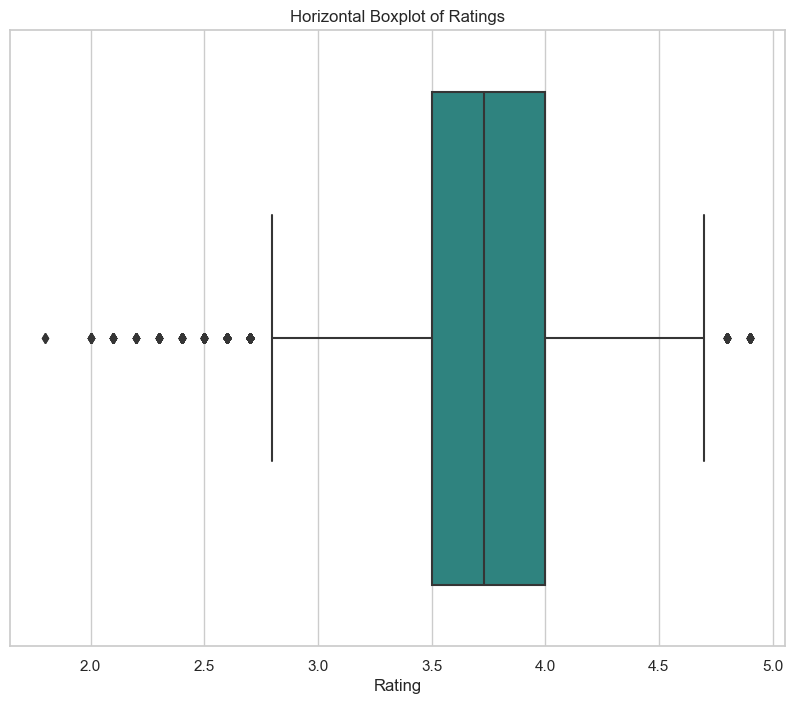

In [77]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='rate', data=after_dropping_duplicate, orient='h', palette='viridis')
plt.title('Horizontal Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

In [59]:
bad_restaurant = after_dropping_duplicate[after_dropping_duplicate['votes'] > 5000]


In [60]:
grouped_bad_restaurant = bad_restaurant.groupby('name').agg({'votes': 'count', 'rate': 'mean'}).reset_index()


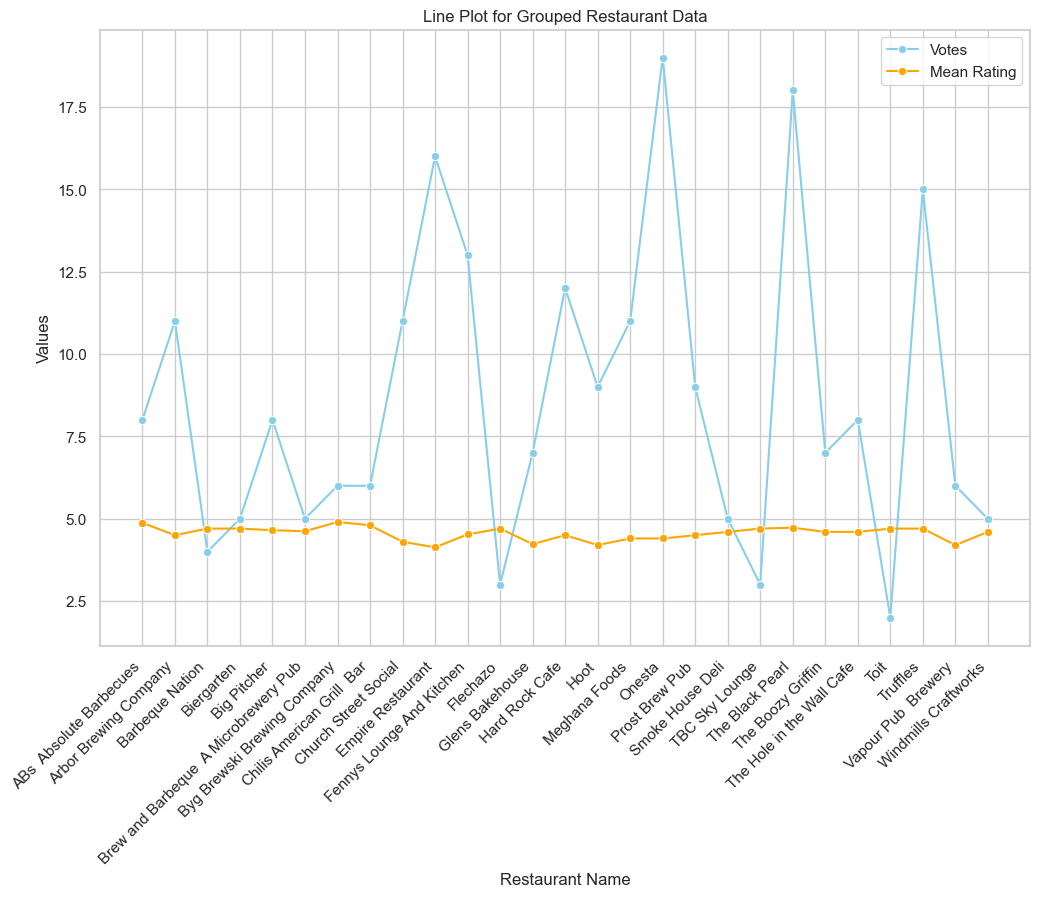

In [83]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.lineplot(x='name', y='votes', data=grouped_bad_restaurant, marker='o', label='Votes', color='skyblue')
sns.lineplot(x='name', y='rate', data=grouped_bad_restaurant, marker='o', label='Mean Rating', color='orange')

plt.title('Line Plot for Grouped Restaurant Data')
plt.xlabel('Restaurant Name')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
grouped_top_restaurant = after_dropping_duplicate.groupby(['location', 'online_order', 'book_table'])[['rate', 'votes']].mean().reset_index()



In [ ]:
grouped_top_restaurant

/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_1198/3989159612.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='location', y='votes', hue='online_order', data=grouped_top_restaurant, ci=None)
/var/folders/yh/7zf4btw14w38cg6ktjs244080000gn/T/ipykernel_1198/3989159612.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='location', y='votes', hue='book_table', data=grouped_top_restaurant, ci=None, palette=palette)


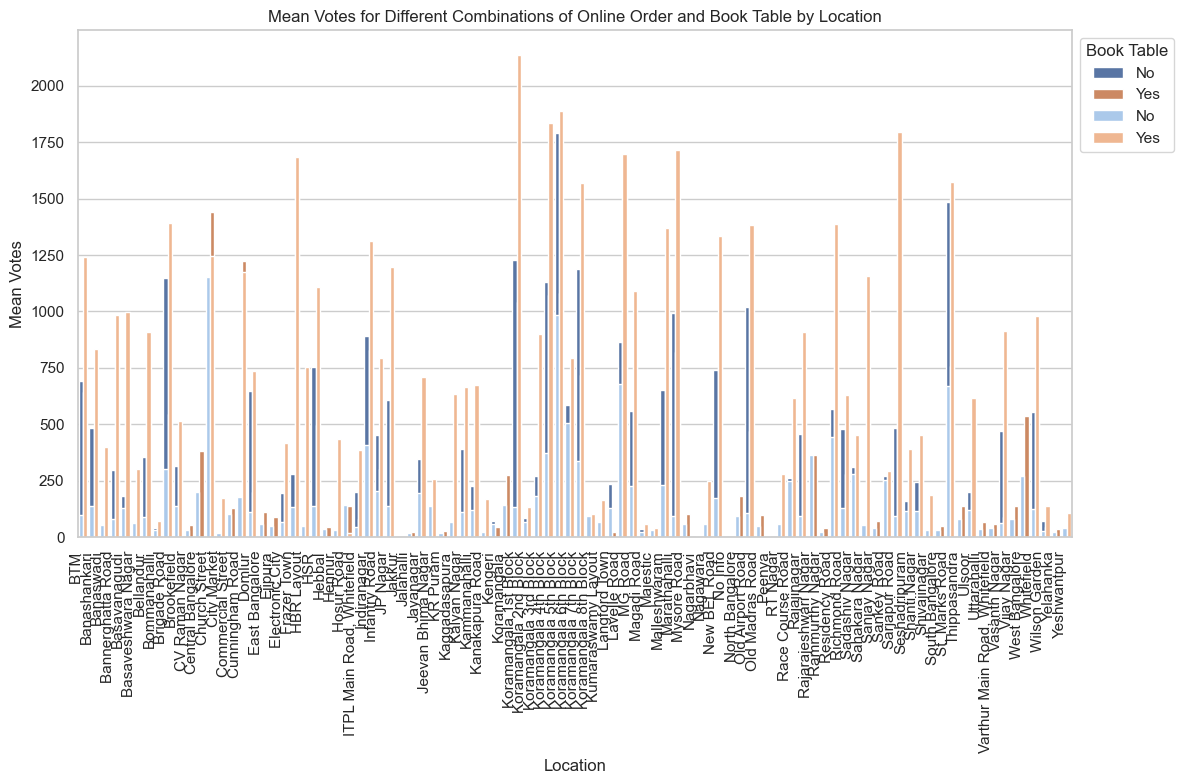

In [110]:


plt.figure(figsize=(12, 8))

sns.barplot(x='location', y='votes', hue='online_order', data=grouped_top_restaurant, ci=None)

palette = sns.color_palette("pastel", 2)
sns.barplot(x='location', y='votes', hue='book_table', data=grouped_top_restaurant, ci=None, palette=palette)

plt.title('Mean Votes for Different Combinations of Online Order and Book Table by Location')
plt.xlabel('Location')
plt.ylabel('Mean Votes')

plt.legend(title='Book Table', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

In [17]:
highest_cost_by_cuisine = df.groupby(['cuisines', 'listed_in(type)'])['approx_cost(for two people)'].max().reset_index()


In [18]:
highest_cost_by_cuisine

cuisines listed_in(type)  \
0                                     African, Burger        Delivery   
1                                     African, Burger        Dine-out   
2     African, Burger, Desserts, Beverages, Fast Food        Delivery   
3     African, Burger, Desserts, Beverages, Fast Food        Dine-out   
4                                            American        Delivery   
...                                               ...             ...   
5821                                       Vietnamese        Delivery   
5822                                       Vietnamese        Dine-out   
5823                                Vietnamese, Salad        Dine-out   
5824              Vietnamese, Thai, Burmese, Japanese        Delivery   
5825              Vietnamese, Thai, Burmese, Japanese        Dine-out   

      approx_cost(for two people)  
0                          1000.0  
1                          1000.0  
2                          1000.0  
3                          1000.0  
4                          1000.0  
...                           ...  
5821                       1000.0  
5822                       3200.0  
5823                       1100.0  
5824                       1000.0  
5825                       1000.0  

[5826 rows x 3 columns]

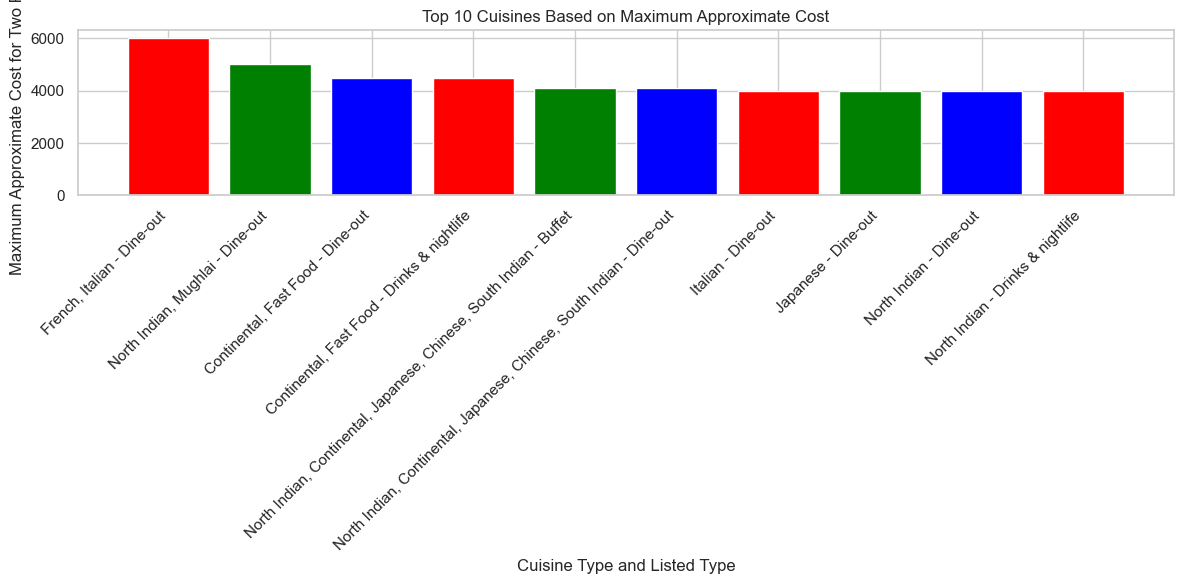

In [98]:
plt.figure(figsize=(12, 6))


colors = ['red', 'green', 'blue']

plt.bar(top_10_cuisines['cuisines'] + ' - ' + top_10_cuisines['listed_in(type)'], 
        top_10_cuisines['approx_cost(for two people)'], 
        color=colors)

plt.xlabel('Cuisine Type and Listed Type')
plt.ylabel('Maximum Approximate Cost for Two People')
plt.title('Top 10 Cuisines Based on Maximum Approximate Cost')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [90]:
grouped_data = after_dropping_duplicate .groupby(['location', 'approx_cost(for two people)', 'listed_in(type)', 'name'])[['rate', 'votes']].agg({'rate': 'mean', 'votes': 'sum'}).reset_index()


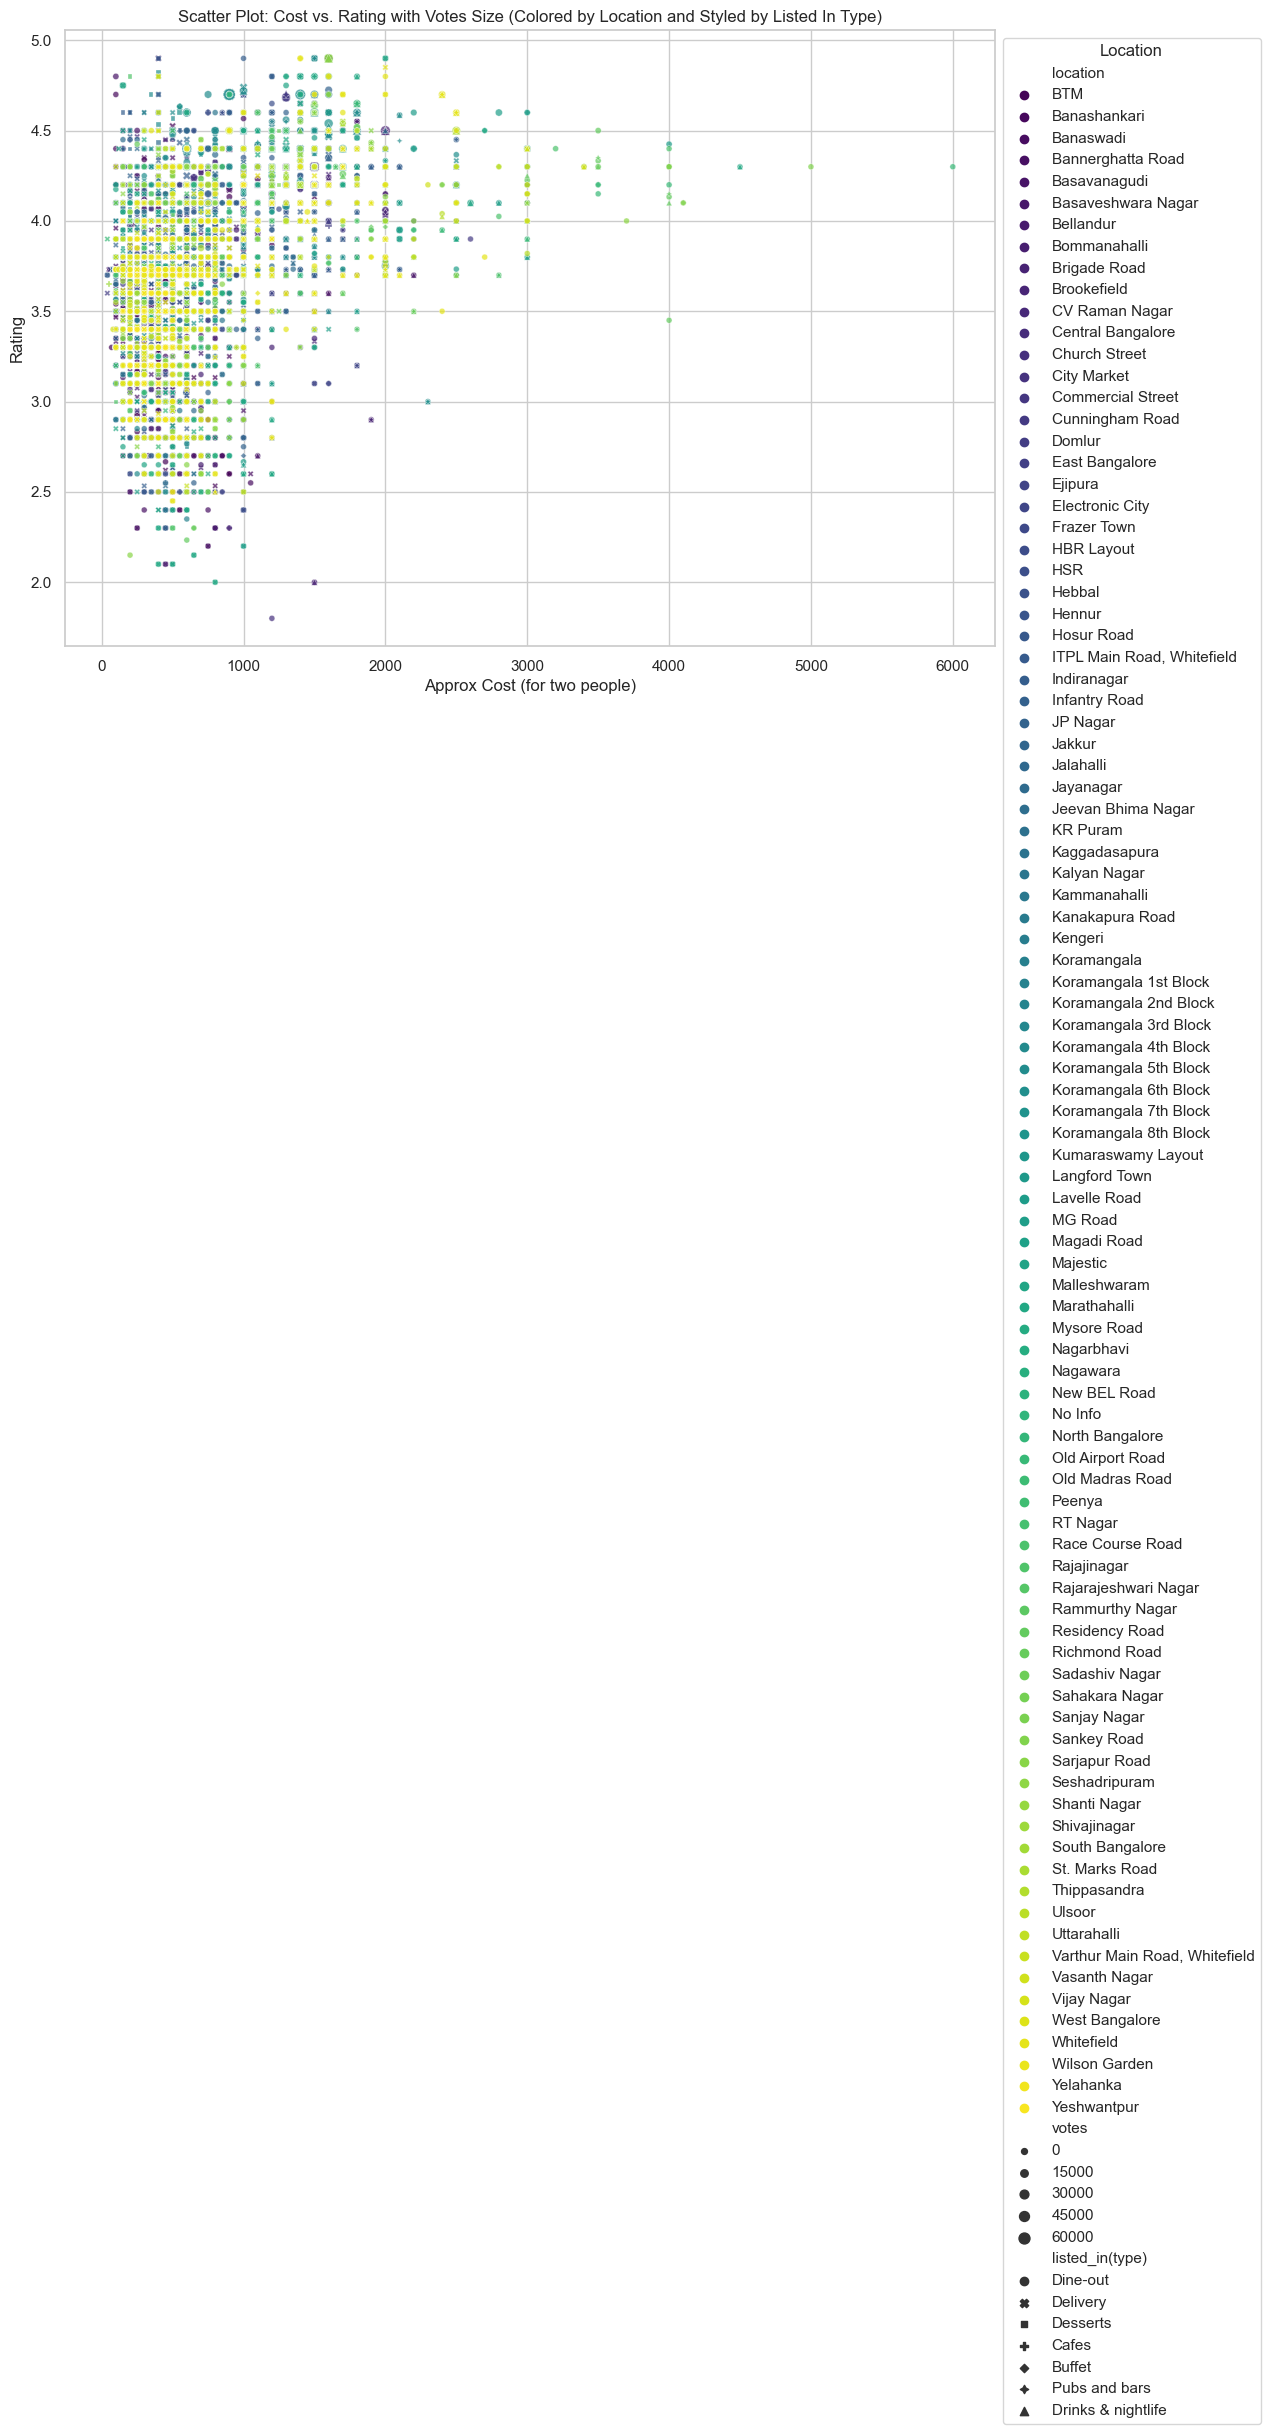

In [91]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='approx_cost(for two people)', y='rate', size='votes', hue='location', style='listed_in(type)', data=grouped_data, alpha=0.7, palette='viridis')

scatter_plot.legend(title='Location', bbox_to_anchor=(1, 1))

plt.title('Scatter Plot: Cost vs. Rating with Votes Size (Colored by Location and Styled by Listed In Type)')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
plt.show()